In [2]:
import csv
import nltk
from konlpy.tag import Kkma
from konlpy.tag import Komoran
from konlpy.corpus import kolaw
from konlpy.tag import Hannanum
from konlpy.tag import Twitter
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from re import match
okt=Okt()
hann=Hannanum()
kkma=Kkma()
kom=Komoran()

In [7]:
#파일 열기
f=open('20210212.txt','r',encoding='utf-8')
sermon=f.read()
f.close()
sermon

'오늘 본문에서 바벨론에서 돌아온 사람들의 명단이 나온다 8-24절은 가문등록부를 가지고 있어서 자신의 혈통을 알고 있던 사람들이다 25-38절은 가문등록부를 잃어버려서 자신의 혈통을 입증하지 못한 사람들이다 그러나 자신의 조상들이 어디 살았는지 알았기에 그곳으로 찾아가서 살았다 39-42절은 제사장 명단이 나오고 43-45절은 레위인 명단이 나온다 46절은 성전에서 일했던 종들의 명단이고 47절부터는 솔로몬 신하들의 자손들이 나온다 이어서 가문등록부도 없고 자신이 어느 지파에 속했는지나 어디서 살았는지도 모르는 사람들의 명단이 나온다 그 중에는 제사장들도 있어서 부정하게 여겼다는 기록이 있다 다른 곳에 기록된 돌아온 사람들의 명단과 비교할 때 총 수는 일치하지만 세부적인 부분에서는 차이가 있다 \n\n느헤미야는 순수 혈통을 나누어 적어놓은 것을 볼 수 있다 이는 성벽을 지은 목적에 합당하게 가기 위함이었다 성벽은 성전을 위해 지었다 예배와 예배 드리는 사람들을 보호하기 위한 목적이 있었다 이 일을 하는 사람들이 예루살렘에 거주해야 하나 그 수가 매우 적었다 그래서 나중에 보면 인구조사를 통해 파악된 사람들을 대상으로 제비뽑기를 통해 10분의 1을 예루살렘에 거주하게 한다 또한 성전에서 일하는 사람들의 필요를 채우게 한다 느헤미야는 성벽만 생각한 것이 아니라 보다 통합적으로 생각한 것이다 그래서 예배 드리기 위한 예루살렘 성전을 염두에 두고 모든 것을 세밀하게 준비했다 인구조사도 이를 위해서 한 것이다 성전만 있고 성벽만 있으면 안된다 예배를 준비하고 예배를 드릴 사람들이 있어야 한다 우리가 왜 새성전을 위해 기도하는가? 예배 드리기 위함이다 \n\n하나님은 이스라엘을 택하셨고 그 약속대로 지금 놀랍게 회복시키고 모든 민족 위에 뛰어나게 만드셨다 하나님 입에서 나온 약속은 다 이루어진다 실수나 실패에도 불구하고 베드로는 예수님이 하신 말씀대로 사람 낚는 어부로서 살아갔고 결국 십자가에 거꾸로 못박혀서 순교했다 베드로가 실패했지만 실패하지 않은것처럼 하나님이 부

In [15]:
#문장 나누기
snt=kkma.sentences(sermon)
len(snt)
snt

['오늘 본문에서 바벨론에서 돌아온 사람들의 명단이 나온다',
 '8-24 절은 가문 등록부를 가지고 있어서 자신의 혈통을 알고 있던 사람들이다',
 '25-38 절은 가문 등록부를 잃어버려서 자신의 혈통을 입증하지 못한 사람들이다',
 '그러나 자신의 조상들이 어디 살았는지 알았기에 그 곳으로 찾아가서 살았다',
 '39-42 절은 제사장 명단이 나오고 43-45 절은 레 위인 명단이 나온다 46 절은 성전에서 일했던 종들의 명단이고 47 절부터 는 솔로몬 신하들의 자손들이 나온다 이어서 가문 등록부도 없고 자신이 어느 지파에 속했는지 나 어디서 살았는지도 모르는 사람들의 명단이 나온다 그 중에는 제사장들도 있어서 부정하게 여겼다는 기록이 있다 다른 곳에 기록된 돌아온 사람들의 명단과 비교할 때 총 수는 일치하지만 세부적인 부분에서는 차이가 있다 느헤미야는 순수 혈통을 나누어 적어 놓은 것을 볼 수 있다 이는 성벽을 지은 목적에 합당하게 가기 위함이었다 성벽은 성전을 위해 지었다 예배와 예배 드리는 사람들을 보호하기 위한 목적이 있었다 이 일을 하는 사람들이 예루 살 렘에 거주해야 하나 그 수가 매우 적었다',
 '그래서 나중에 보면 인구조사를 통해 파악된 사람들을 대상으로 제비 뽑기를 통해 10분의 1을 예루 살 렘에 거주하게 한다 또한 성전에서 일하는 사람들의 필요를 채우게 한다 느헤미야는 성벽만 생각한 것이 아니라 보다 통합적으로 생각한 것이다',
 '그래서 예배 드리기 위한 예루 살 렘 성전을 염두에 두고 모든 것을 세밀하게 준비했다 인구조사도 이를 위해서 한 것이다 성전만 있고 성벽만 있으면 안된다 예배를 준비하고 예배를 드릴 사람들이 있어야 한다 우리가 왜 새 성전을 위해 기도하는 가? 예배 드리기 위함이다',
 '하나님은 이스라엘을 택하셨고 그 약속대로 지금 놀랍게 회복시키고 모든 민족 위에 뛰어나게 만드셨다 하나님 입에서 나온 약속은 다 이루어진다 실수나 실패에도 불구하고 베드로는 예수님이 하신 말씀대로 사람 낚는 어부로서 살아갔고 결국 십자가

In [9]:
#형태소 분리
snt=hann.nouns(sermon)
snt

['오늘',
 '본문',
 '바벨론',
 '사람',
 '명단',
 '8-24절',
 '가문등록부',
 '자신',
 '혈통',
 '사람들',
 '25-38절',
 '가문등록부',
 '자신',
 '혈통',
 '입증',
 '사람들',
 '자신',
 '조상들',
 '그곳',
 '39-42절',
 '제사장',
 '명단',
 '43-45절',
 '레',
 '명단',
 '46절',
 '성전',
 '일',
 '종',
 '명단',
 '47절',
 '솔로몬',
 '신하들',
 '자손들',
 '이',
 '가문등록부',
 '자신',
 '지파',
 '지',
 '어디',
 '사람',
 '명단',
 '중',
 '제사장들',
 '부정',
 '기록',
 '곳',
 '기록',
 '사람',
 '명단',
 '비교',
 '때',
 '수',
 '일치',
 '세부적',
 '부분',
 '차이',
 '느헤미야',
 '순수',
 '혈통',
 '것',
 '수',
 '이',
 '성벽',
 '목적',
 '합당',
 '성벽',
 '성전',
 '예배',
 '예배',
 '사람들',
 '보호',
 '목적',
 '일',
 '사람',
 '예루살렘',
 '거주',
 '하나',
 '수',
 '나중',
 '인구조사',
 '파악',
 '사람들',
 '대상',
 '제비뽑기',
 '10분',
 '1',
 '예루살렘',
 '거주',
 '성전',
 '일',
 '사람',
 '필요',
 '느헤미야',
 '성벽',
 '생각',
 '것',
 '통합적',
 '생각',
 '것',
 '예배',
 '예루살렘',
 '성전',
 '염두',
 '것',
 '세밀',
 '준비',
 '인구조사',
 '이',
 '것',
 '성전',
 '성벽',
 '예배',
 '준비',
 '예배',
 '사람',
 '우리',
 '새성전',
 '기도',
 '예배',
 '하나님',
 '이스라엘',
 '약속',
 '회복시키',
 '민족',
 '위',
 '하나님',
 '입',
 '약속',
 '실수',
 '실패',
 '불구',
 '베드',
 '예수님',
 '말씀',
 '사람',
 '어부',

In [10]:
#2글자 이상의 단어 추출
nouns=[]
for noun in hann.nouns(sermon):
    if len(str(noun)) >= 2 and not(match('^[0-9]', noun)) :
        nouns.append(noun)
nouns

['오늘',
 '본문',
 '바벨론',
 '사람',
 '명단',
 '가문등록부',
 '자신',
 '혈통',
 '사람들',
 '가문등록부',
 '자신',
 '혈통',
 '입증',
 '사람들',
 '자신',
 '조상들',
 '그곳',
 '제사장',
 '명단',
 '명단',
 '성전',
 '명단',
 '솔로몬',
 '신하들',
 '자손들',
 '가문등록부',
 '자신',
 '지파',
 '어디',
 '사람',
 '명단',
 '제사장들',
 '부정',
 '기록',
 '기록',
 '사람',
 '명단',
 '비교',
 '일치',
 '세부적',
 '부분',
 '차이',
 '느헤미야',
 '순수',
 '혈통',
 '성벽',
 '목적',
 '합당',
 '성벽',
 '성전',
 '예배',
 '예배',
 '사람들',
 '보호',
 '목적',
 '사람',
 '예루살렘',
 '거주',
 '하나',
 '나중',
 '인구조사',
 '파악',
 '사람들',
 '대상',
 '제비뽑기',
 '예루살렘',
 '거주',
 '성전',
 '사람',
 '필요',
 '느헤미야',
 '성벽',
 '생각',
 '통합적',
 '생각',
 '예배',
 '예루살렘',
 '성전',
 '염두',
 '세밀',
 '준비',
 '인구조사',
 '성전',
 '성벽',
 '예배',
 '준비',
 '예배',
 '사람',
 '우리',
 '새성전',
 '기도',
 '예배',
 '하나님',
 '이스라엘',
 '약속',
 '회복시키',
 '민족',
 '하나님',
 '약속',
 '실수',
 '실패',
 '불구',
 '베드',
 '예수님',
 '말씀',
 '사람',
 '어부',
 '십자가',
 '못박혀서',
 '순교',
 '베드',
 '실패',
 '실패',
 '하나님',
 '백성',
 '그분',
 '사람',
 '하나님',
 '후회하심',
 '하나님은',
 '말씀',
 '말씀하시',
 '가시는것이다\xa0',
 '본문',
 '가문등록부',
 '자신',
 '혈통',
 '사람',
 '반면',
 '가문등록부',
 '사람',
 '바벨론',
 '족

In [11]:
#단어 빈도 분석
snt_count={}
for noun in nouns:
    snt_count[noun] = snt_count.get(noun, 0) + 1
snt_count

{'오늘': 2,
 '본문': 3,
 '바벨론': 4,
 '사람': 16,
 '명단': 10,
 '가문등록부': 5,
 '자신': 5,
 '혈통': 8,
 '사람들': 9,
 '입증': 1,
 '조상들': 1,
 '그곳': 1,
 '제사장': 3,
 '성전': 10,
 '솔로몬': 1,
 '신하들': 1,
 '자손들': 1,
 '지파': 1,
 '어디': 2,
 '제사장들': 2,
 '부정': 1,
 '기록': 3,
 '비교': 1,
 '일치': 1,
 '세부적': 1,
 '부분': 1,
 '차이': 1,
 '느헤미야': 4,
 '순수': 1,
 '성벽': 5,
 '목적': 3,
 '합당': 1,
 '예배': 6,
 '보호': 1,
 '예루살렘': 4,
 '거주': 2,
 '하나': 1,
 '나중': 1,
 '인구조사': 2,
 '파악': 1,
 '대상': 1,
 '제비뽑기': 1,
 '필요': 2,
 '생각': 4,
 '통합적': 1,
 '염두': 1,
 '세밀': 2,
 '준비': 3,
 '우리': 10,
 '새성전': 2,
 '기도': 1,
 '하나님': 17,
 '이스라엘': 1,
 '약속': 4,
 '회복시키': 1,
 '민족': 1,
 '실수': 1,
 '실패': 3,
 '불구': 2,
 '베드': 2,
 '예수님': 2,
 '말씀': 2,
 '어부': 1,
 '십자가': 1,
 '못박혀서': 1,
 '순교': 1,
 '백성': 1,
 '그분': 1,
 '후회하심': 2,
 '하나님은': 1,
 '말씀하시': 1,
 '가시는것이다\xa0': 1,
 '반면': 1,
 '족보': 1,
 '급급': 1,
 '성경': 2,
 '약속하신대로': 1,
 '본토': 1,
 '현실': 1,
 '안주': 1,
 '중심': 2,
 '그것': 1,
 '세상': 3,
 '자신의것들': 1,
 '과시해': 1,
 '예수': 2,
 '그리스도': 1,
 '구원': 1,
 '기억': 1,
 '위엄': 1,
 '영적세계에서': 1,
 '진짜': 1,
 '뿌리': 2,
 '중요'

In [12]:
#빈도수 top 10
counter=Counter(snt_count)
top10=counter.most_common(10)
top10

[('하나님', 17),
 ('사람', 16),
 ('명단', 10),
 ('성전', 10),
 ('우리', 10),
 ('사람들', 9),
 ('혈통', 8),
 ('예배', 6),
 ('가문등록부', 5),
 ('자신', 5)]

In [13]:
#top10 데이터 프레임화
df=pd.DataFrame(top10)
df.columns=["단어","frq"]
df

,단어,frq
0,하나님,17
1,사람,16
2,명단,10
3,성전,10
4,우리,10
5,사람들,9
6,혈통,8
7,예배,6
8,가문등록부,5
9,자신,5


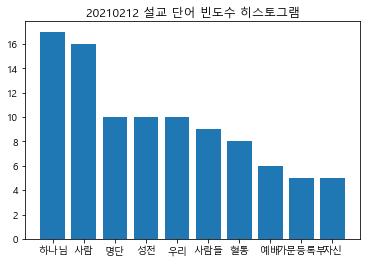

In [14]:
#데이터 프레임 히스토그램화
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False
plt.title('20210212 설교 단어 빈도수 히스토그램')
plt.bar(df['단어'],df['frq'])
plt.savefig('20210212.png')